<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [59]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [61]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [62]:
boston_df=pd.read_csv(boston_url)

### Add your code below following the instructions given in the course to complete the peer graded assignment

#### Task 1: Familiarize with the dataset

In [63]:
# Check the DataFrame
print("General Information")
boston_df.info()
print()
print("Duplicates")
print(f"{boston_df.duplicated().sum()} duplicate(s)")
print()
print("Missing Values")
print(boston_df.isna().sum())
print()
print("First Rows")
boston_df.head()

General Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB

Duplicates
0 duplicate(s)

Missing Values
Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE         

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per USD10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in USD1000's

#### Task 2: Generate Descriptive Statistics and Visualizations

In [64]:
# Generate basic Descriptive Statistics
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


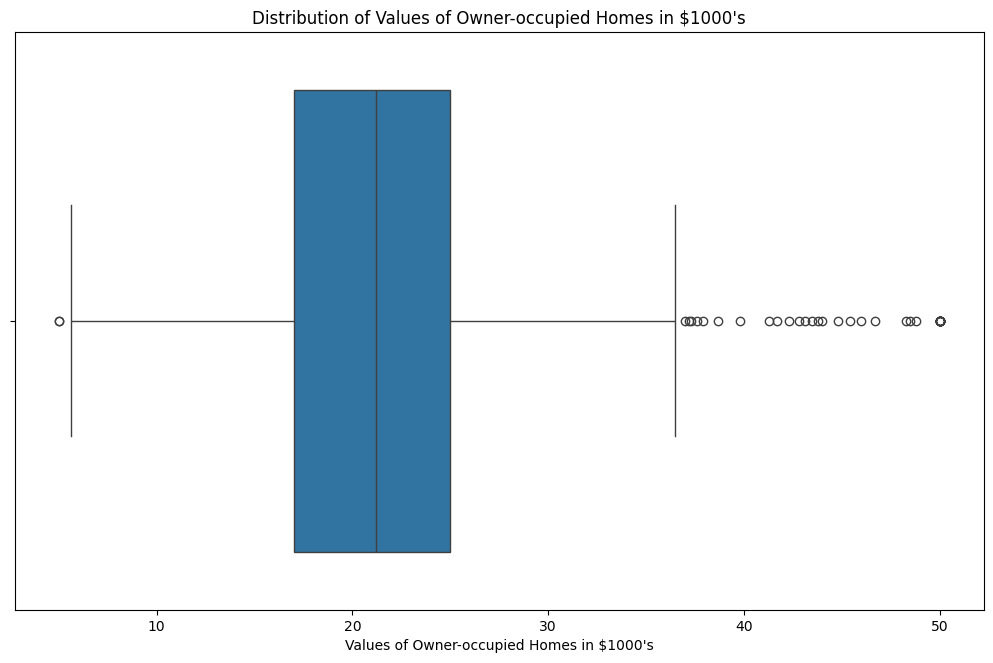

The median value of owner-occupied homes prior to 1940 was 21200$.


In [65]:
# Provide a boxplot for the "Median value of owner-occupied homes"
pyplot.figure(figsize=(12.5, 7.5))
sns.boxplot(data=boston_df, x="MEDV")
pyplot.xlabel("Values of Owner-occupied Homes in $1000's")
pyplot.title("Distribution of Values of Owner-occupied Homes in $1000's")
pyplot.show()
print(f"The median value of owner-occupied homes prior to 1940 was {int(boston_df["MEDV"].median() * 1000)}$.")

*Most (50%) owner-occupied homes were valued between USD17000 and USD25000, with a median at USD21200. There are outliers with values as high as USD50000.*

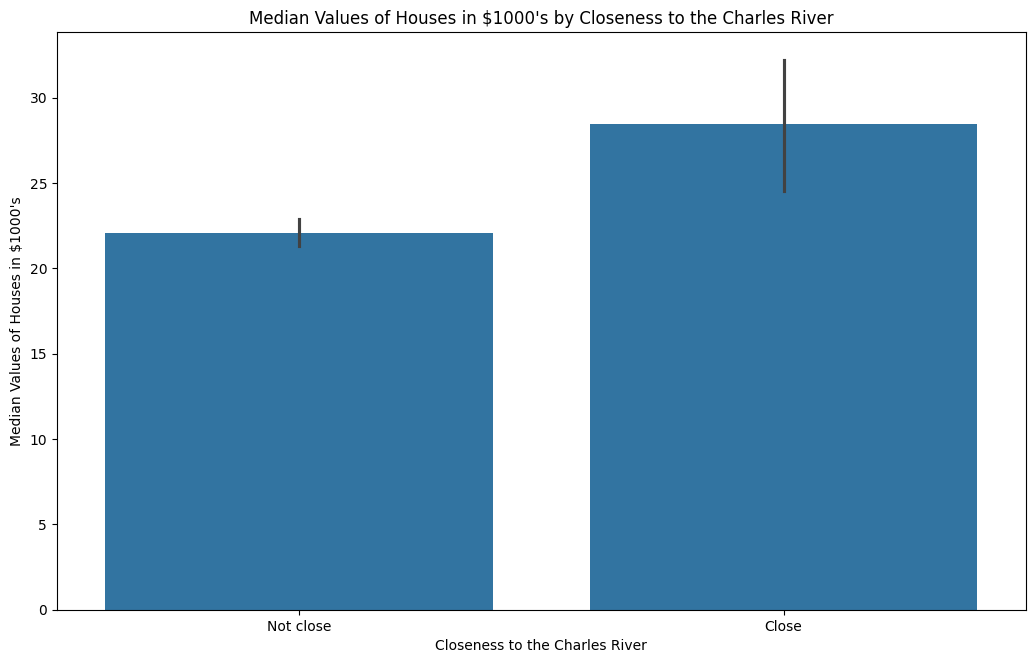

In [66]:
# Provide a barplot for the Charles river variable
pyplot.figure(figsize=(12.5, 7.5))
sns.barplot(data=boston_df, x="CHAS", y="MEDV")
pyplot.xlabel("Closeness to the Charles River")
pyplot.xticks([0, 1], ["Not close", "Close"])
pyplot.ylabel("Median Values of Houses in $1000's")
pyplot.title("Median Values of Houses in $1000's by Closeness to the Charles River")
pyplot.show()

*Houses' values tend to be higher when they are close to the Charles River.*

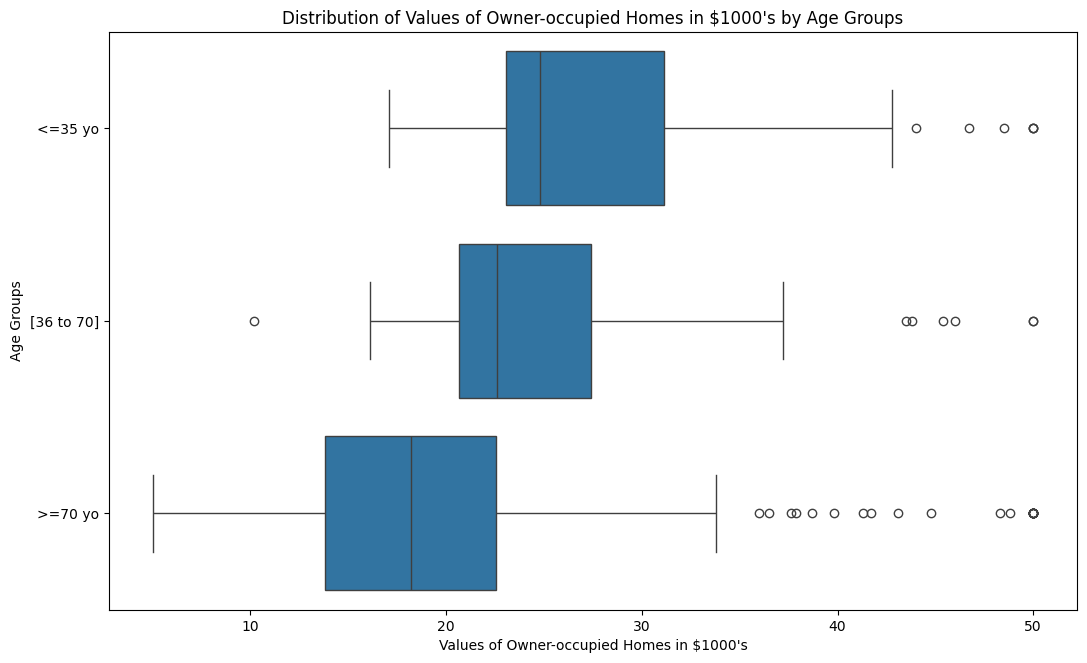

In [67]:
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df["AGE_GROUPS"] = boston_df["AGE"].apply(lambda age: 
                                                 "<=35 yo" if age <= 35 else
                                                 "[36 to 70]" if age < 70 else
                                                 ">=70 yo")
age_groups_order = ["<=35 yo", "[36 to 70]", ">=70 yo"]

# Provide a boxplot for the MEDV variable vs the AGE variable
pyplot.figure(figsize=(12.5, 7.5))
sns.boxplot(data=boston_df, x="MEDV", y="AGE_GROUPS", order=age_groups_order)
pyplot.xlabel("Values of Owner-occupied Homes in $1000's")
pyplot.ylabel("Age Groups")
pyplot.title("Distribution of Values of Owner-occupied Homes in $1000's by Age Groups")
pyplot.show()

*Homes values tend to be higher for young home owners, even though some outliers exist.*

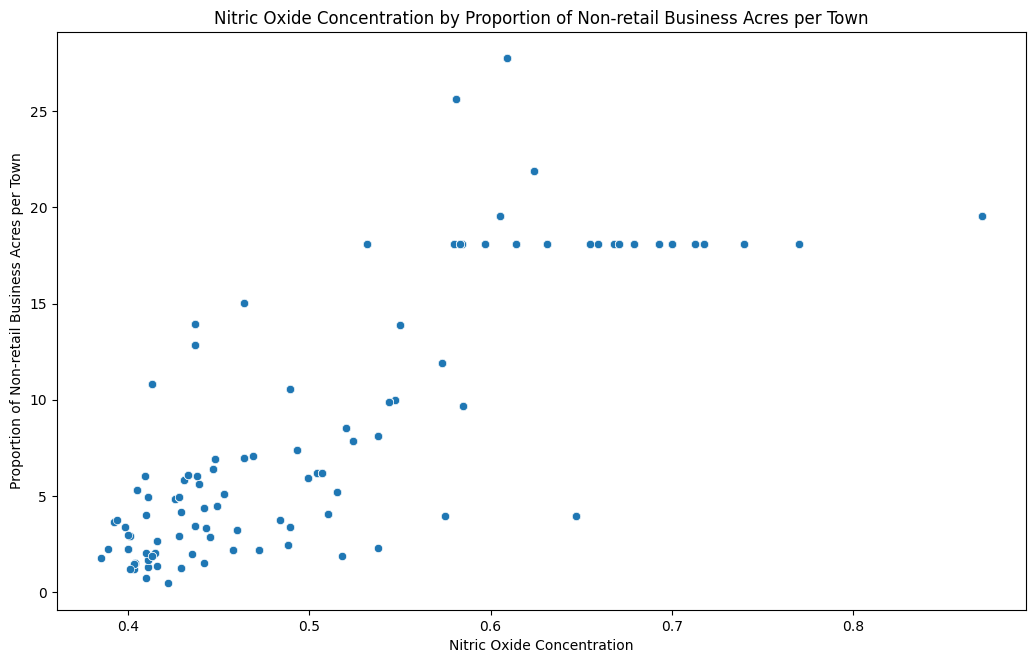

In [68]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations 
# and the proportion of non-retail business acres per town
pyplot.figure(figsize=(12.5, 7.5))
sns.scatterplot(data=boston_df, x="NOX", y="INDUS")
pyplot.xlabel("Nitric Oxide Concentration")
pyplot.ylabel("Proportion of Non-retail Business Acres per Town")
pyplot.title("Nitric Oxide Concentration by Proportion of Non-retail Business Acres per Town")
pyplot.show()

*There is a positive correlation between Nitric Oxide Concentration and the Proportion of Non-Retail Business Acres per town. It suggests that these businesses may contribute to Nitric Oxide emissions in the environment.*

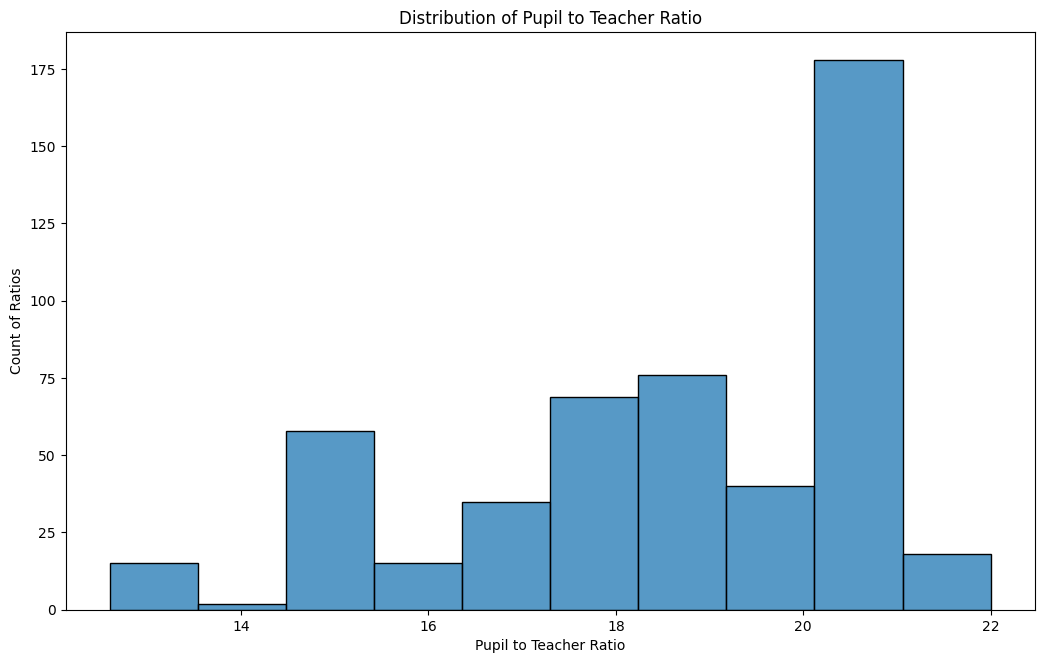

In [69]:
# Create a histogram for the pupil to teacher ratio variable
pyplot.figure(figsize=(12.5, 7.5))
sns.histplot(data=boston_df, bins=10, x="PTRATIO")
pyplot.xlabel("Pupil to Teacher Ratio")
pyplot.ylabel("Count of Ratios")
pyplot.title("Distribution of Pupil to Teacher Ratio")
pyplot.show()

*The distribution is left-skewed, with most values concentrated on the right side and a tail on the left. It suggests that most towns have 21 pupils per teacher.*

#### Task 3: Use the appropriate tests to answer the questions provided

##### Is there a significant difference in median value of houses bounded by the Charles river or not?
* H0: There is no significant difference in median value of houses bounded by the Charles river compared to those not bounded
* H1: There is a significant difference in median value of houses bounded by the Charles river compared to those not bounded

In [70]:
# Separate and Perform a T-test for independent samples
houses_bounded_by_river = boston_df[boston_df["CHAS"] == 1]["MEDV"]
houses_not_bounded_by_river = boston_df[boston_df["CHAS"] == 0]["MEDV"]
ttest_results = stats.ttest_ind(houses_bounded_by_river, houses_not_bounded_by_river)
print(ttest_results)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)


*Since the P-value (7.4e-05) is inferior to the Alpha-value (0.05), I reject the Null Hypothesis (H0) and state that there is a significant difference in median value of houses bounded by the Charles River compared to those not bounded.*

##### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
* H0: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
* H1: There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [71]:
# Group the MEDV values by AGE_GROUPS and Perform an ANOVA
anova_results = stats.f_oneway(
    boston_df[boston_df['AGE_GROUPS'] == '<=35 yo']['MEDV'],
    boston_df[boston_df['AGE_GROUPS'] == '[36 to 70]']['MEDV'],
    boston_df[boston_df['AGE_GROUPS'] == '>=70 yo']['MEDV'])
print(anova_results)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)


*Since the P-value (1.7e-15) is inferior to the Alpha-value (0.05), I reject the Null Hypothesis (H0) and state that there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).*

##### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
* H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
* H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [72]:
# Calculate the Pearson Correlation and P-value
pearson_results = pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(pearson_results)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)


*Since the P-value (7.9e-98) is inferior to the Alpha-value (0.05) and the Pearson Correlation coefficient is 0.76, I reject the Null Hypothesis (H0) and state that there is a strong positive correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.*

##### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

In [73]:
# Define the explanatory and dependent variables and Perform a Linear Regression
X = boston_df["DIS"]
y = boston_df["MEDV"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        11:18:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

*The impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes is an increase in median values (USD1091.60). However, the R-squared value (0.062) is quite low and means that this linear model doesn't explain most of the variance; so I can't state that the distance has a relevant impact on home values.*